## CS 457 - Homework Assignment 3: Exploratory Data Analysis
### Ali Hashir
#### ah05433@st.habib.edu.pk

## PART 1

In [1]:
import pandas as pd
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline 
import numpy as np

In [2]:
df = pd.read_csv("loan_small.csv")
df.head(5) 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,INDIVIDUAL


### Check datatype of each attribute for EDA

In [3]:
df.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
pymnt_plan                  object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
mths_since_last_delinq     float64
mths_since_last_record     float64
open_acc            

In [4]:
df['revol_util']

0      83.7
1       9.4
2      98.5
3      21.0
4      53.9
       ... 
994    62.9
995    76.8
996    83.0
997    79.4
998    66.0
Name: revol_util, Length: 999, dtype: float64

### Cleaning Data


In [5]:
df['term'] = df['term'].str.strip('months')

In [6]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,INDIVIDUAL


In [7]:
df['emp_length']

0      10+ years
1       < 1 year
2      10+ years
3      10+ years
4         1 year
         ...    
994      5 years
995      3 years
996      2 years
997    10+ years
998    10+ years
Name: emp_length, Length: 999, dtype: object

In [8]:
df['emp_length'] = df['emp_length'].dropna()

In [9]:
df['emp_length'] = df['emp_length'].str.replace(r'\D', '', regex = True).astype(float)

In [10]:
df['emp_length']

0      10.0
1       1.0
2      10.0
3      10.0
4       1.0
       ... 
994     5.0
995     3.0
996     2.0
997    10.0
998    10.0
Name: emp_length, Length: 999, dtype: float64

In [11]:
# checking unique attributes to decide binary attribute division
df['loan_status'].unique() 

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)'], dtype=object)

In [12]:
df['loan_status'] = df['loan_status'].replace(['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late (31-120 days)'], ['Good', 'Good', 'Good', 'Bad', 'Bad'])

In [13]:
df['loan_status'].unique()

array(['Good', 'Bad'], dtype=object)

### Filling missing values based on std

In [14]:
df['mths_since_last_delinq'].isna()

0       True
1       True
2       True
3      False
4      False
       ...  
994    False
995    False
996     True
997     True
998     True
Name: mths_since_last_delinq, Length: 999, dtype: bool

In [15]:
df['mths_since_last_delinq'].unique()

array([nan, 35., 38., 61.,  8., 20., 18., 68., 45., 48., 41., 40., 74.,
       25., 53., 39., 10., 26., 56., 77., 28., 52., 24., 16., 60., 54.,
       23.,  9., 11., 13., 65., 19., 80., 22., 59., 79., 44., 64., 57.,
       14., 63., 49., 15., 73., 70., 29., 51.,  5., 75., 55.,  2., 30.,
       47., 33., 69.,  4., 43., 21., 27., 46., 81., 78., 82., 31., 76.,
       62., 72., 42., 50.,  3., 12., 67., 36., 34., 58., 17., 71.])

In [16]:
df['mths_since_last_delinq'].std()

21.887597959676718

In [17]:
df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(df['mths_since_last_delinq'].median())

In [18]:
df['mths_since_last_delinq'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
994    False
995    False
996    False
997    False
998    False
Name: mths_since_last_delinq, Length: 999, dtype: bool

In [19]:
df['mths_since_last_record'].isna()

0      True
1      True
2      True
3      True
4      True
       ... 
994    True
995    True
996    True
997    True
998    True
Name: mths_since_last_record, Length: 999, dtype: bool

In [20]:
df['mths_since_last_delinq'].std()

10.379952927711134

In [21]:
df['mths_since_last_record'] = df['mths_since_last_record'].fillna(df['mths_since_last_record'].median())

In [22]:
df['mths_since_last_record'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
994    False
995    False
996    False
997    False
998    False
Name: mths_since_last_record, Length: 999, dtype: bool

### Checking null values

In [23]:
df['mths_since_last_delinq'].isnull().sum()

0

In [24]:
df['mths_since_last_record'].isnull().sum()

0

## PART 2

In [25]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type
0,1077501,1296599,5000,5000,4975.00000,36,10.65,162.87,B,B2,...,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.00000,60,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.00000,36,15.96,84.33,C,C5,...,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.00000,36,13.49,339.31,C,C1,...,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.00000,60,12.69,67.79,B,B5,...,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1057818,1289186,7000,7000,7000.00000,36,8.90,222.28,A,A5,...,8000.34,7000.00,1000.34,0.00,0.00,0.00,Dec-14,229.64,Dec-14,INDIVIDUAL
995,1057629,1289394,2425,2425,2425.00000,36,15.27,84.39,C,C4,...,3052.79,2424.99,612.80,15.00,0.00,0.00,Jan-15,16.06,Jul-15,INDIVIDUAL
996,1057621,1289385,6950,6950,6950.00000,36,9.91,223.97,B,B1,...,7349.48,6950.01,399.47,0.00,0.00,0.00,Sep-12,1560.92,Apr-14,INDIVIDUAL
997,1057787,1289153,12375,12375,12344.46478,36,9.91,398.79,B,B1,...,13399.63,12375.01,1058.95,0.00,0.00,0.00,Dec-12,9056.48,Jan-16,INDIVIDUAL


In [26]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,...,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
count,9.990000e+02,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,982.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,1.060005e+06,1.291575e+06,12704.354354,12197.797798,12137.165302,12.961331,366.992743,5.365580,62118.790330,14.641191,...,393.475025,392.977998,13218.969378,13123.601622,10395.572492,2703.640891,1.081158,118.674915,9.817802,2762.736486
std,1.602660e+04,2.112723e+04,7463.253235,6804.931895,6743.323264,3.881742,200.510423,3.347029,31899.138102,6.268761,...,1372.152659,1370.738354,8515.600032,8384.022752,6727.488181,2757.603166,6.533628,606.058706,87.107689,4426.094619
min,7.659270e+05,9.431350e+05,1000.000000,1000.000000,1000.000000,6.030000,33.940000,1.000000,12000.000000,0.720000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.058868e+06,1.290204e+06,7050.000000,7000.000000,7000.000000,9.910000,223.440000,2.000000,40000.000000,10.015000,...,0.000000,0.000000,6903.943290,6894.465000,5110.360000,960.535000,0.000000,0.000000,0.000000,281.185000
50%,1.061891e+06,1.293501e+06,11500.000000,11000.000000,10800.000000,12.690000,337.750000,5.000000,55000.000000,14.800000,...,0.000000,0.000000,11599.078020,11593.400000,9600.000000,1807.880000,0.000000,0.000000,0.000000,530.780000
75%,1.065345e+06,1.299062e+06,16050.000000,16000.000000,15946.571055,15.960000,469.235000,9.000000,75500.000000,19.630000,...,0.000000,0.000000,17559.547470,17404.910000,14000.000000,3279.710000,0.000000,0.000000,0.000000,3516.275000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,23.910000,1243.850000,10.000000,276000.000000,29.850000,...,10069.400000,10062.140000,45755.229980,44519.610000,35000.000000,19834.120000,94.480000,11349.520000,2043.180000,28412.430000


In [27]:
loan_value = df.loan_amnt.value_counts().nlargest(20)

In [28]:
loan_value

loan_amnt
10000    87
12000    81
5000     41
15000    40
6000     34
20000    33
8000     30
7000     30
18000    29
16000    26
25000    26
35000    23
14000    21
4000     18
3000     18
7200     17
13000    15
24000    14
30000    11
21000    11
Name: count, dtype: int64

### The highest amount of loan given is 35000 but the most common loan amount is 10000, given to 87 people
### The lowest amount of loan given is 1000

In [29]:
df[["loan_status", "annual_inc"]].groupby("loan_status").mean()

,annual_inc
loan_status,
Bad,60666.666667
Good,62123.164197


In [30]:
df[["loan_status", "id"]].groupby("loan_status").count()

,id
loan_status,
Bad,3
Good,996


### Based on the annual income, there are 3 members having a bad loan status i.e. either their loan is in default state or delayed by 31-120 days while the rest have a good status. The rest of them have either fully paid their loans, or are charged off, or have currently been given the loan.

In [31]:
df[["home_ownership", "annual_inc"]].groupby("home_ownership").mean()

,annual_inc
home_ownership,
MORTGAGE,74708.381098
OWN,56619.440000
RENT,55882.323054


### The average annual income on the basis of different types of home ownership is shown above. The analysis shows that the Mortgage home owners have the highest annual income on average as compared to the other two types of ownership (rent and owned)

## Univariate

<Axes: xlabel='loan_amnt'>

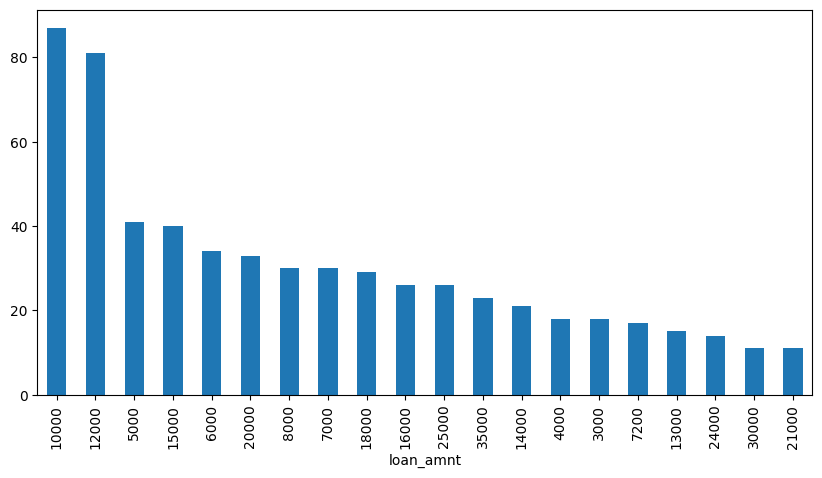

In [32]:
loan_value.plot(kind='bar', figsize=(10,5))

### The top 20 loan amounts along with their frequencies are shown in the bar plot above. This plot is a visualization of the loan summary of top 20 loan amounts in the data. 

(array([ 18.,  19.,  20.,  26.,  28.,  46.,  41.,  73.,  84., 105., 110.,
        131., 117., 113.,  68.]),
 array([ 0.        ,  6.65333333, 13.30666667, 19.96      , 26.61333333,
        33.26666667, 39.92      , 46.57333333, 53.22666667, 59.88      ,
        66.53333333, 73.18666667, 79.84      , 86.49333333, 93.14666667,
        99.8       ]),
 <BarContainer object of 15 artists>)

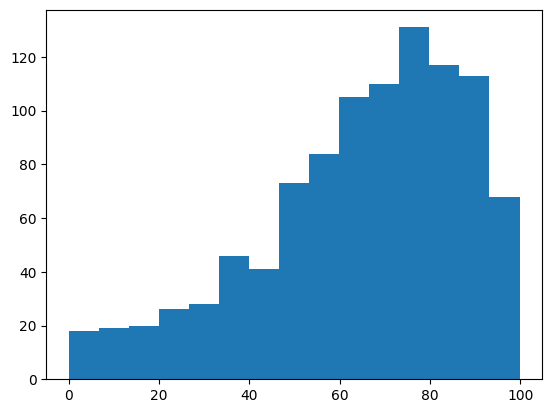

In [33]:
plt.hist(df['revol_util'], bins = 15)

### Revolving line utilization rate, or the amount of credit the borrowers use relative to all available revolving credit is plotted w.r.t its ranges. The highest amount of borrowed credit is shown to be 79.84 having a value of 131. 

<Axes: xlabel='home_ownership', ylabel='count'>

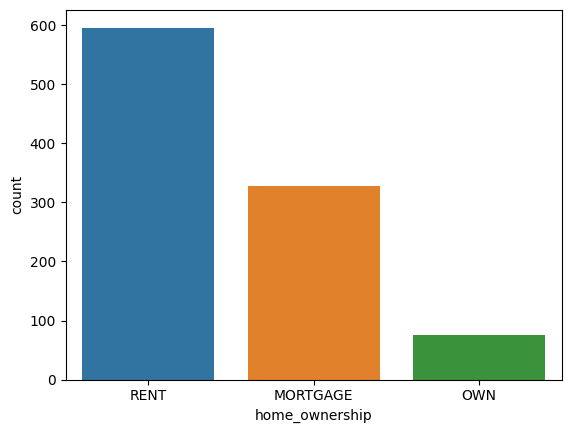

In [34]:
sns.countplot(x ='home_ownership', data = df, order=df['home_ownership'].value_counts()[:10].index)

### The 3 different type of house ownerships are plotted against their respective counts in the dataset. In this particular dataset, the highest amount of loan borrowers own a rented house. As we saw in the above summaries that Mortgage home owners have the highest average annual income, so the relatively lesser financially stable  part of the population (rented home owners) need more loans to survive.

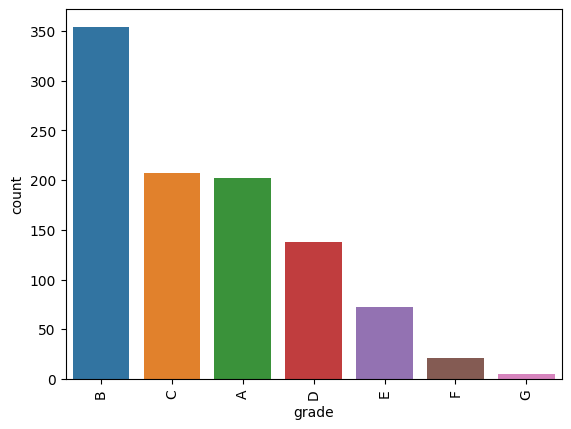

In [35]:
ax = sns.countplot(x ='grade', data = df, order=df['grade'].value_counts()[:10].index)
ax.tick_params(axis='x', rotation=90)

### The count plot shows how many of each loan grade is given from the total loans. We can interpret from the above visualization that B grade loan is the most common among all, given to around 350 people, while the most uncommon loan grade id G, given to less than 50 people. 

# Bivariate Analysis (using two variables)

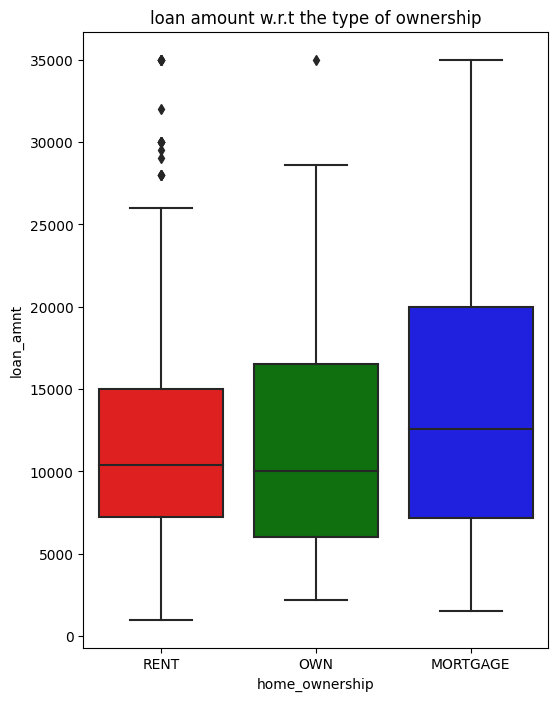

In [36]:
plt.figure(figsize=(6,8))
colors = ['red', 'green','blue']
sns.boxplot(data =df, x='home_ownership', y='loan_amnt',palette=colors)
plt.title('loan amount w.r.t the type of ownership')
plt.show()

### The above plot is showing the relationship between the type of home ownership and the amount of loan given to each. As we can see that the higher the level of home ownership, the more the range of loans. The higher the status, the more the level of loan that is required. For e.g. rent owners loan range from above 6000 and till 15000 while that of mortgage owners go up to  around 20000.

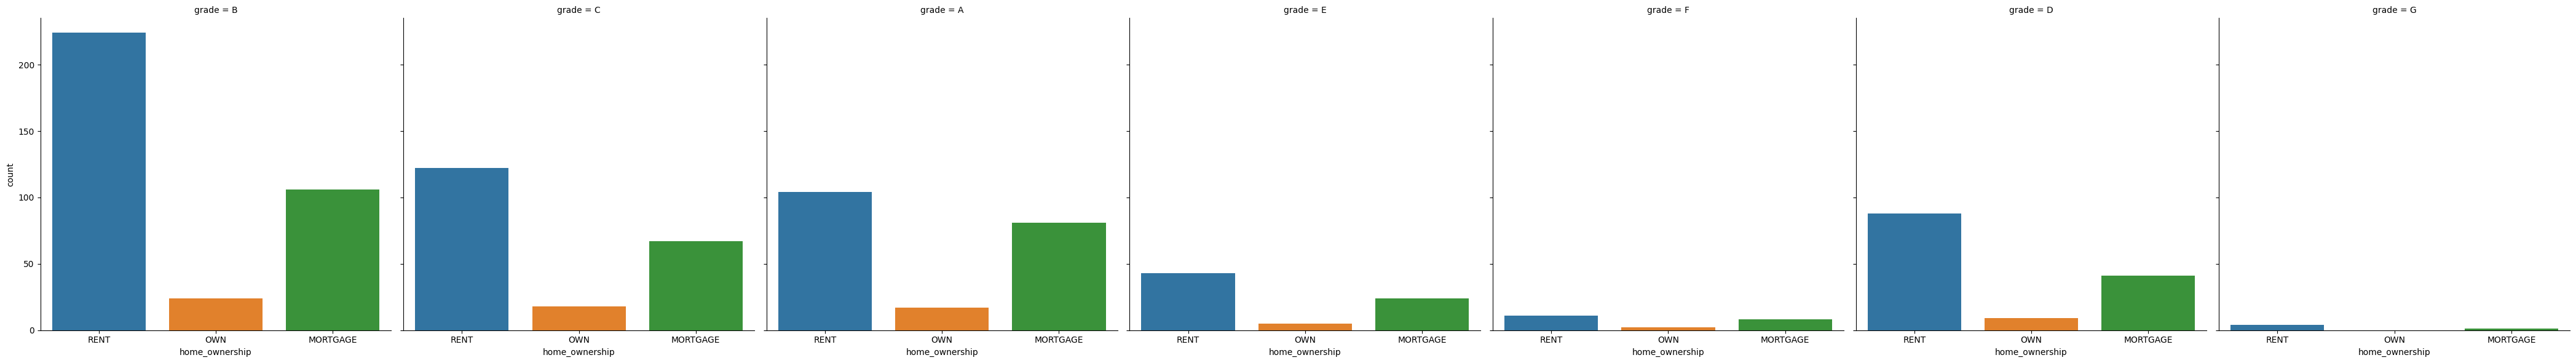

In [37]:
sns.catplot(x="home_ownership", col="grade",
                data=df, kind="count",
                height=6, aspect=1);

### Each home ownership type is plotted for a particular grade in the given dataset. We can see that in almost all of them, the rent owners have the highest loan while the 2nd highest is usually mortgage owners and then owned. 

## Scatter plot

<Axes: xlabel='annual_inc', ylabel='dti'>

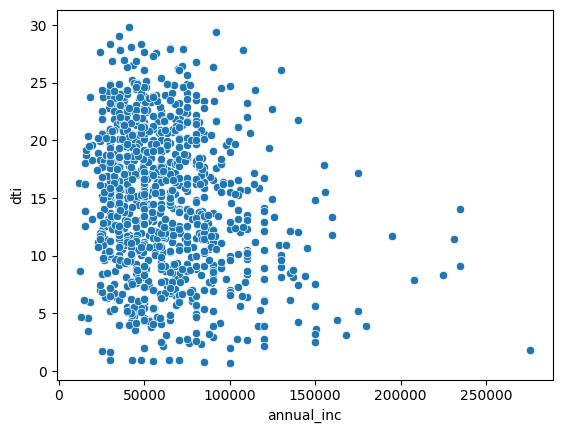

In [38]:
sns.scatterplot(data=df, x="annual_inc", y="dti")

### The scatterplot shows a weak and negative association between ‘annual income’ and ‘debt to income ratio’. As the annual income of a person increases, the lesser debt he will be likely to be under. Hence, the negative relationship seems plausible in this case.

<Axes: xlabel='annual_inc', ylabel='total_rec_late_fee'>

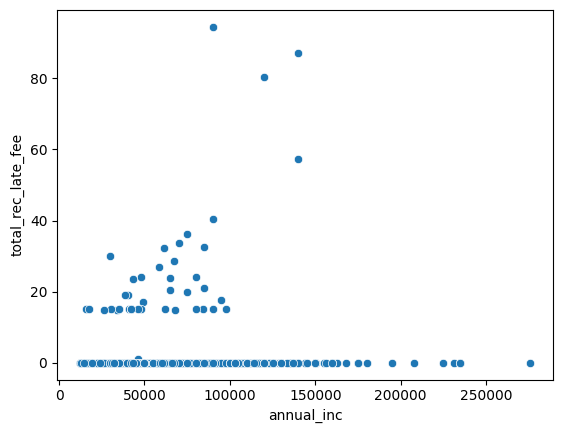

In [39]:

sns.scatterplot(data=df, x="annual_inc", y="total_rec_late_fee")

### The people having low annual incomes have a higher record of paying late fees. This means that the low income earners have a higher chance of getting their salaries finished before they can complete their paymetns and are therefore usually late in paying their fees.

## Correlation plot

In [40]:
plt.figure(figsize = (19,14))
sns.heatmap(round(df.corr(), 2),annot=True)

ValueError: could not convert string to float: 'B'

<Figure size 1900x1400 with 0 Axes>

### The lighter the tile in the correlation plot of the dataframe shown above, the stronger the relation between the two attributes.
### The loan amount has a strong relationship with the installment 
### Since the loan amount has a negative relationship with the delinquency rate in 2 yrs, the person who has committed a minor crime is likely to receive a lower amount of loan. Moreover, the direct relationship between the loan and installment also proves with the negative correlation between installmetn and delinq_2yrs.